# MNIST: Handwritten digit classification - exercise 04
 >__Created__:  2018 Harrison B. Prosper



### Exercise
  1. Build deep network, using __MLPClassifier__, to classifier handwritten digits from the MNIST database 
  1. Try one and two hidden layers.
  1. Vary the number of nodes/layer

In [1]:
import os, sys
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib

import matplotlib as mp
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline

In [3]:
# update fonts
FONTSIZE = 20
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}

mp.rc('font', **font)

### Load MNIST data into memory


In [4]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

# rescale the data and split into a train and test set
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

### Plot a selection of images from the training data

In [41]:
def plotImages(X, y, nx=5, ny=5, ftsize=FONTSIZE/3, fgsize=(15,15)):
    q, ax = plt.subplots(nx, ny, figsize=fgsize)
    im = 0
    for ix in range(nx):
        for iy in range(ny):
            ax[ix, iy].imshow(X[im].reshape(28,28))
            im += 1400
    plt.show()

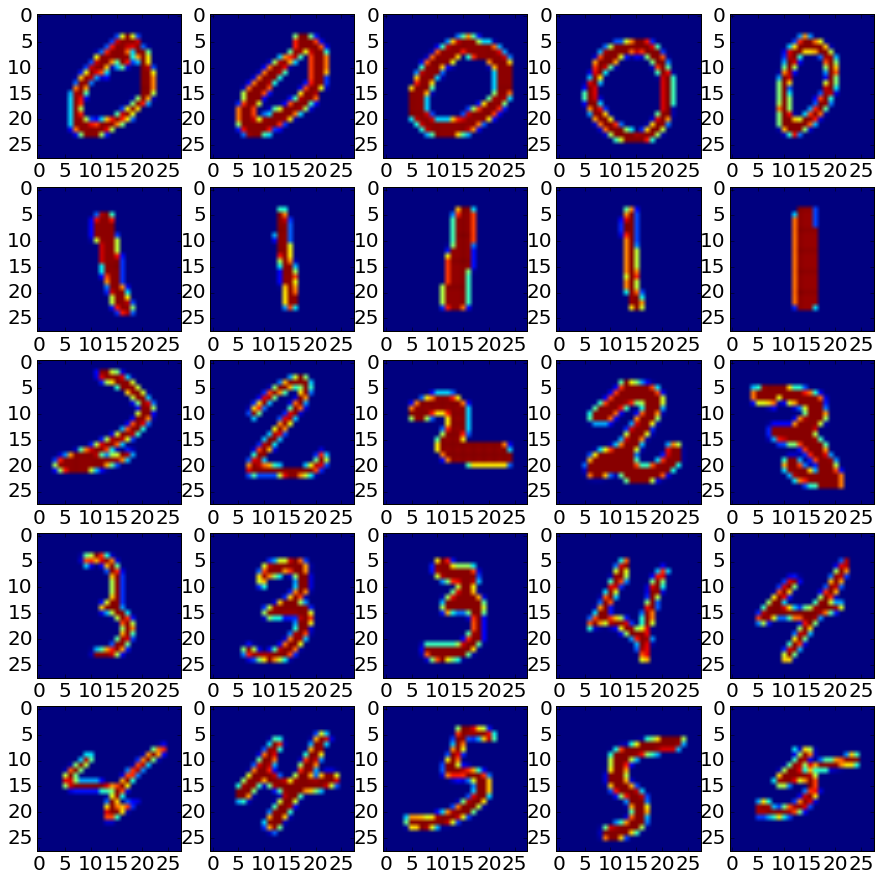

In [42]:
plotImages(X_train, y_train)

### Train classifier

In [58]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), 
                    max_iter=500, 
                    alpha=1e-2,
                    solver='adam', 
                    verbose=1, 
                    tol=1e-5, 
                    warm_start=False,
                    random_state=1)

print "*** TRAINING ***"
mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))      
print("Test set score:     %f" % mlp.score(X_test,  y_test))

filename = '04_mnist.pkl'
print "save to %s" % filename
joblib.dump(mlp, filename)

*** TRAINING ***
Iteration 1, loss = 0.41278698
Iteration 2, loss = 0.16503810
Iteration 3, loss = 0.12199558
Iteration 4, loss = 0.09599779
Iteration 5, loss = 0.08010236
Iteration 6, loss = 0.06917142
Iteration 7, loss = 0.05995689
Iteration 8, loss = 0.05239612
Iteration 9, loss = 0.04834423
Iteration 10, loss = 0.04435654
Iteration 11, loss = 0.03880153
Iteration 12, loss = 0.03662153
Iteration 13, loss = 0.03342750
Iteration 14, loss = 0.03181076
Iteration 15, loss = 0.02928681
Iteration 16, loss = 0.03081740
Iteration 17, loss = 0.02740724
Iteration 18, loss = 0.02667170
Iteration 19, loss = 0.02781976
Iteration 20, loss = 0.02640969
Iteration 21, loss = 0.02499630
Iteration 22, loss = 0.02740164
Iteration 23, loss = 0.02697219
Iteration 24, loss = 0.02291247
Iteration 25, loss = 0.02238202
Iteration 26, loss = 0.02610873
Iteration 27, loss = 0.02581465
Iteration 28, loss = 0.02306082
Training loss did not improve more than tol=0.000010 for two consecutive epochs. Stopping.
Train

['04_mnist.pkl']

### Plot loss curve vs. epochs

In [51]:
def plotLoss(mlp, ftsize=FONTSIZE):
    y    = mlp.loss_curve_
    x    = np.array(range(len(y)))+1

    ymin = 0.8*min(y)
    ymax = 1.2*max(y)
    epoch= range(len(y))
    xmin = 0
    xmax = len(x)
    
    # set size of figure
    plt.figure(figsize=(8,4));

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(r'epoch', fontsize=ftsize)
    plt.ylabel(r'loss',  fontsize=ftsize)
    
    # choose color of points
    plt.plot(x, y, 'b-')
    plt.savefig('04_mnist_loss.png')
    plt.show()

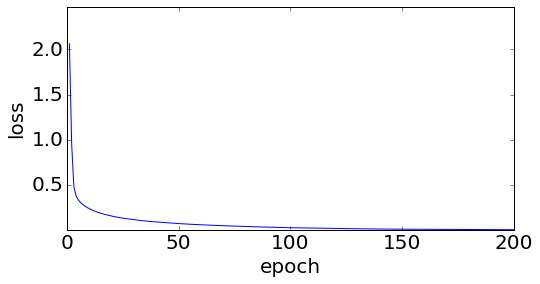

In [52]:
plotLoss(mlp)